In [14]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

In [15]:
# Carica il dataset
file_path = 'input/output.csv'
data = pd.read_csv(file_path)

data = data.dropna(subset=['content'])
print("Numero di righe prima del filtro:", len(data))

def is_english_alphabet(text):
    return bool(re.match(r'^[A-Za-z0-9\s.,!?\'"]+$', text))


data['is_english'] = data['content'].apply(is_english_alphabet)
data = data[data['is_english']]
print("Numero di righe dopo il filtro:", len(data))

print("Distribuzione delle classi:\n", data['is_positive'].value_counts())

Numero di righe prima del filtro: 200723
Numero di righe dopo il filtro: 141278
Distribuzione delle classi:
 is_positive
Positive    73178
Negative    68100
Name: count, dtype: int64


In [16]:
data.head()

,id,app_id,content,author_id,is_positive,is_english
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative,True
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative,True
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative,True
5,176118004,100,Every enemy and their grandmother have aimbot ...,76561198296823531,Negative,True
6,172896379,100,l,76561199182060159,Negative,True


In [17]:
data_positive = data[data['is_positive'] == 'Positive']
data_negative = data[data['is_positive'] == 'Negative']

In [18]:
corpus_split_pos = list(data_positive['content'])
corpus_split_neg = list(data_negative['content'])

In [19]:
# Helper function which concatenates all the data into a single corpus.

def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

In [20]:
corpus_pos = concatenate_list_data(corpus_split_pos)
corpus_neg = concatenate_list_data(corpus_split_neg)

In [21]:
# Scarica le stopwords se necessario
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dswal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


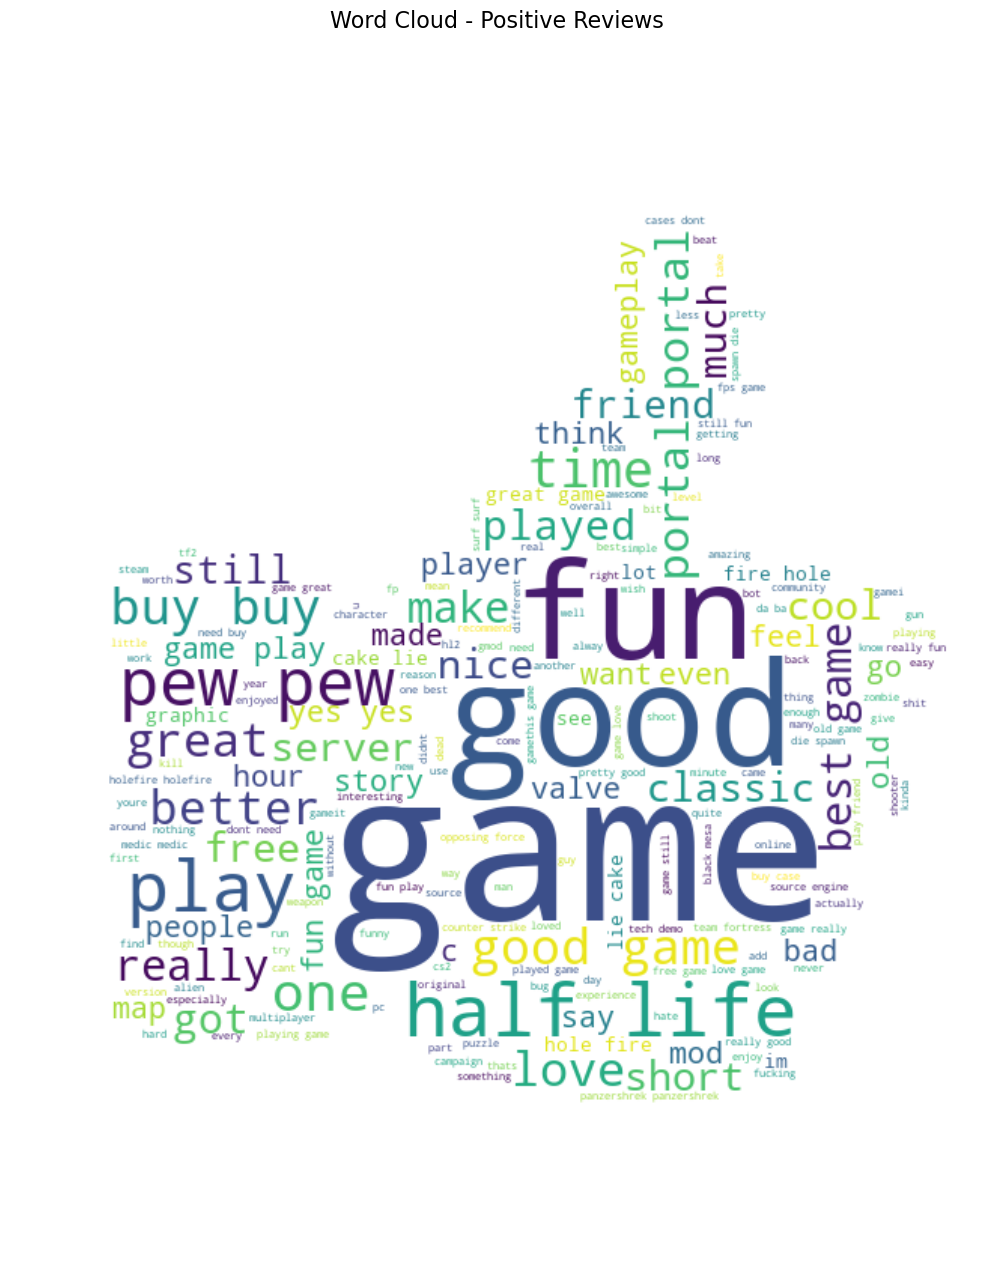

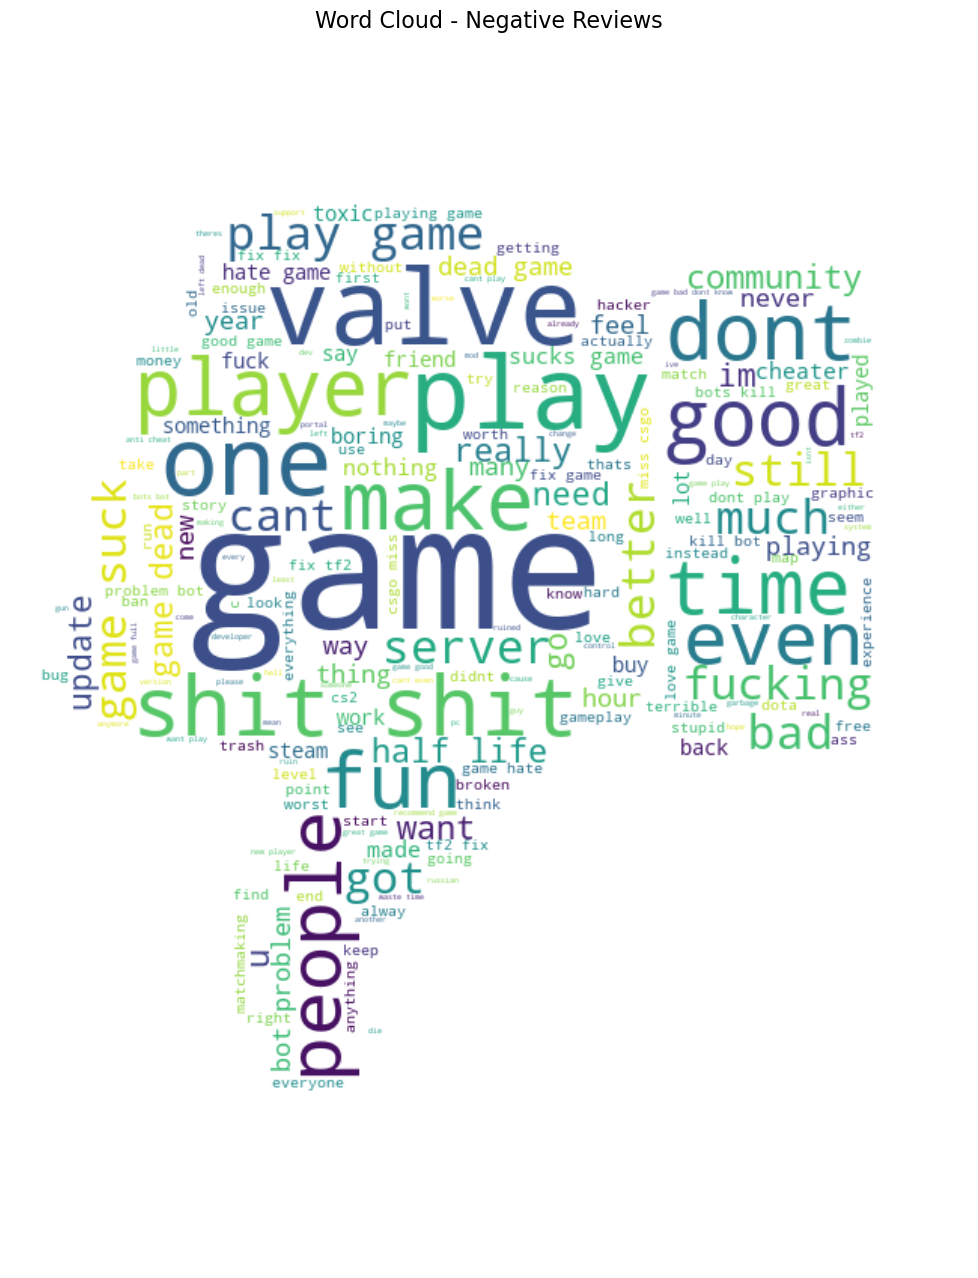

In [29]:
def clean_text(text):
    text = text.lower()  # Converti tutto in minuscolo
    text = re.sub(r'[^\w\s]', '', text)  # Rimuove punteggiatura
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Rimuove stopwords
    return text

# Pulisci il corpus
corpus_pos_clean = clean_text(corpus_pos)
corpus_neg_clean = clean_text(corpus_neg)

# Carica le maschere (immagini in bianco e nero con le forme desiderate)
thumbs_up_mask = np.array(Image.open("thumbs up.jpg"))
thumbs_down_mask = np.array(Image.open("thumbs down.jpg"))

# Genera word cloud per recensioni positive
wordcloud_pos = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    mask=thumbs_up_mask,
).generate(corpus_pos_clean)

# Genera word cloud per recensioni negative
wordcloud_neg = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    mask=thumbs_down_mask,
).generate(corpus_neg_clean)

# Visualizza la word cloud per le recensioni positive
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews', fontsize=16)
plt.axis('off')
plt.show()

# Visualizza la word cloud per le recensioni negative
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews', fontsize=16)
plt.axis('off')
plt.show()
